In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mlt
%matplotlib inline

In [12]:
df=pd.read_excel('C:/Users/Roshan/Desktop/AllStudentWithBPData.xlsx')

In [14]:
df.head(25)

,UHID,BP
0,100-0000-0001,104/75 mmHg
1,100-0000-0002,NaN
2,100-0000-0003,NaN
3,100-0000-0004,NaN
4,100-0000-0005,NaN
5,100-0000-0006,NaN
6,100-0000-0007,NaN
7,100-0000-0008,NaN
8,100-0000-0009,NaN
9,100-0000-0010,NaN


In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.head(25)

,UHID,BP
0,100-0000-0001,104/75 mmHg
19,100-0000-0020,110/68 mmHg
21,100-0000-0022,127/80 mmHg
27,100-0000-0028,124/81 mmHg
37,100-0000-0038,115/71 mmHg
41,100-0000-0042,115/75 mmHg
42,100-0000-0043,115/69 mmHg
44,100-0000-0045,122/76 mmHg
48,100-0000-0049,109/76 mmHg
53,100-0000-0054,130/73 mmHg


In [63]:
df['Split_BP']=df['BP'].apply(lambda x:re.split("\D", x))

In [156]:
df['Systole']=df['Split_BP'].apply(lambda x: x[0]).astype('int64')

In [137]:
#df['Systole']=df['Systole'].apply(lambda col:pd.to_numeric(col, errors='coerce',downcast='integer'))

UHID        0
BP          0
Systole     1
Split_BP    0
Diastole    0
dtype: int64

In [155]:
df['Diastole']=df['Split_BP'].apply(lambda x: x[1]).astype('int64')

In [68]:
df

,UHID,BP,Systole,Split_BP,Diastole
0,100-0000-0001,104/75 mmHg,104,"[104, 75, , , , , , ]",75
19,100-0000-0020,110/68 mmHg,110,"[110, 68, , , , , , ]",68
21,100-0000-0022,127/80 mmHg,127,"[127, 80, , , , , , ]",80
27,100-0000-0028,124/81 mmHg,124,"[124, 81, , , , , , ]",81
37,100-0000-0038,115/71 mmHg,115,"[115, 71, , , , , , ]",71
...,...,...,...,...,...
3011,100-0000-1502,155/93 mmHg,155,"[155, 93, , , , , , ]",93
3012,100-0000-1503,88/59 mmHg,88,"[88, 59, , , , , , ]",59
3015,100-0000-1506,153/102 mmHg,153,"[153, 102, , , , , , ]",102
3016,100-0000-1507,123/65 mmHg,123,"[123, 65, , , , , , ]",65


In [142]:
df.isnull().sum()

UHID        0
BP          0
Systole     1
Split_BP    0
Diastole    0
dtype: int64

In [152]:
df.dropna(axis=0,inplace=True)

In [153]:
df.isnull().sum()

UHID        0
BP          0
Systole     0
Split_BP    0
Diastole    0
dtype: int64

In [178]:
df.dtypes

UHID        object
BP          object
Systole      int64
Split_BP    object
Diastole     int64
dtype: object

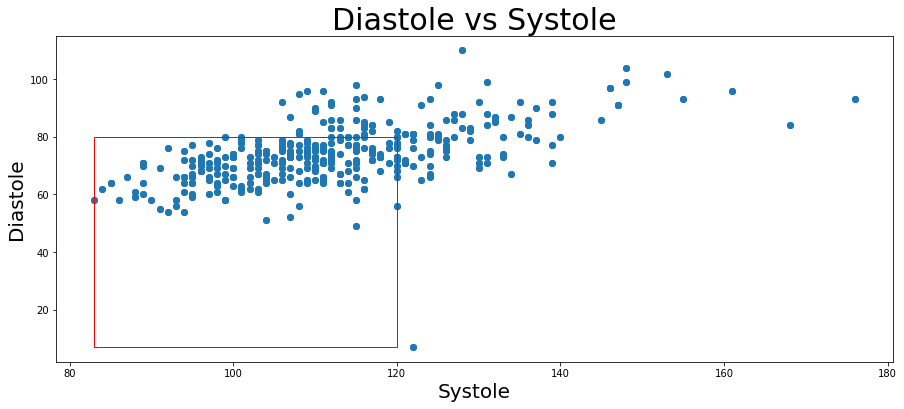

In [243]:
width =120 - min_f0
height =80 - min_f1
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
ax.scatter(df['Systole'],df['Diastole'])
plt.title('Diastole vs Systole',fontsize=30)
plt.xlabel('Systole',fontsize=20)
plt.ylabel('Diastole',fontsize=20)
min_f1=df['Diastole'].min()
min_f0=df['Systole'].min()
ax.add_patch(
    patches.Rectangle(
        xy=(min_f0,min_f1),  # point of origin.
        width=width,
        height=height,
        linewidth=1,
        color='red',
        fill=False
    ))
#plt.savefig('C:/Users/Roshan/Desktop/Diastole Vs Systole.png')

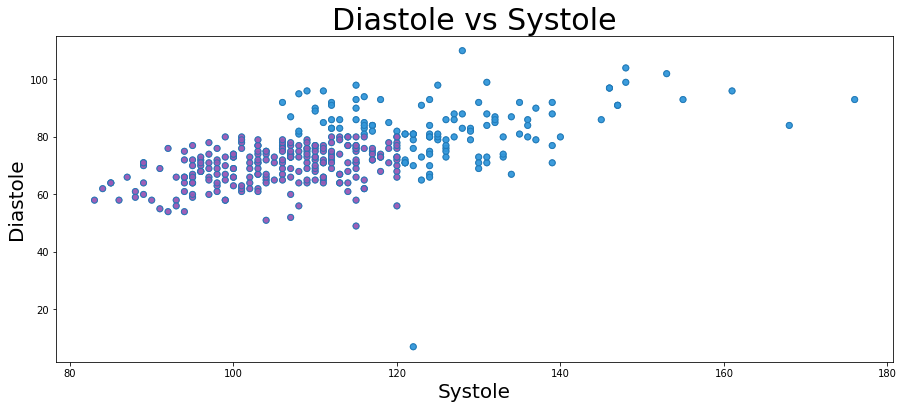

In [239]:
value=(df['Diastole']<=80) & (df['Systole']<=120)
df['color']= np.where( value==True , "#9b59b6", "#3498db")
plt.figure(figsize=(15,6))
plt.title('Diastole vs Systole',fontsize=30)
plt.xlabel('Systole',fontsize=20)
plt.ylabel('Diastole',fontsize=20)
sns.regplot(data=df, x="Systole", y="Diastole", fit_reg=False, scatter_kws={'facecolors':df['color']})

#plt.savefig('C:/Users/Roshan/Desktop/Diastole Vs Systole2.png')